<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 2
#### Tomas A. Albanesi


## Indice de contenidos:
* [Consigna](#consigna)
* [Punto 1](#punto1)
* [Punto 2](#punto2)
* [Punto 3](#punto3)
* [Bonus: Simulacion numerica (sin normalizar)](#simNumericaSinNorm)
* [Bonus: Simulacion circuital (sin normalizar)](#simCircuitalSinNorm)
* [Bonus: Normalizacion en frecuencia e impedancia](#normalizacion)
* [Bonus: Simulacion numerica (con normalizar)](#simNumericaConNorm)
* [Bonus: Simulacion circuital (con normalizar)](#simCircuitalConNorm)
* [Bonus: Sensibilidad](#sensibilidad)
* [Bonus: Transferencia Butterworth](#transferenciaButter)
* [Bonus: Filtro pasabanda](#filtroPasabanda)
* [Conclusiones](#conclusiones)

### Consigna <a class="anchor" id="consigna"></a>

#### Red

<img src="./img/TS2_Albanesi_ConsignaRed.png" width="800" />

#### Puntos

<img src="./img/TS2_Albanesi_ConsignaPuntos.png" width="800" /> 

### Punto 1 - Hallar transferencia en funcion de $\omega_0$ y $Q$ <a class="anchor" id="punto1"></a>

#### Resolucion analitica

En el siguiente archivo pdf digitalizado se muestra la resolucion de la transferencia de la red pedida, asi como su correspondiente parametrizacion en funcion de $\omega_0$ y $Q$.
Principalmente se resolvio aplicando sumatoria de corrientes en nodos definidos y utilizando las propiedades de cortocircuito virtual en los opamps.

In [15]:
# Incorporacion y visualizacion de PDF con la resolucion analitica del punto 1
from IPython.display import IFrame
IFrame("./doc/TS2_Albanesi_AnaliticoPunto1.pdf", width=1000, height=1000)

### Punto 2 - Obtener los valores de los componentes para $\omega_0 = 1$ y $Q = 3$ <a class="anchor" id="punto2"></a>

#### Resolucion analitica

En el siguiente pdf se mostrara la obtencion de los valores de los componentes a partir de la definicion de $\omega_0$ y $Q$

In [14]:
# Incorporacion y visualizacion de PDF con la resolucion analitica del punto 3
from IPython.display import IFrame
IFrame("./doc/TS2_Albanesi_AnaliticoPunto2.pdf", width=1000, height=1000)

### Punto 3 - Ajustar R1 para $\left | T(0) \right | = 20 dB$ <a class="anchor" id="punto3"></a>

#### Resolucion analitica

In [13]:
# Incorporacion y visualizacion de PDF con la resolucion analitica del punto 3
from IPython.display import IFrame
IFrame("./doc/TS2_Albanesi_AnaliticoPunto3.pdf", width=1000, height=1000)

### Bonus: Simulacion numerica Python (sin normalizacion) <a class="anchor" id="simNumericaSinNorm"></a>

##### Importacion de librerias

In [8]:
# Importacion de librerias a utilizar
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot
from scipy.signal import TransferFunction
import numpy as np
import matplotlib.pyplot as plt

##### Inicializacion de graficos

In [9]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

##### Graficos

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

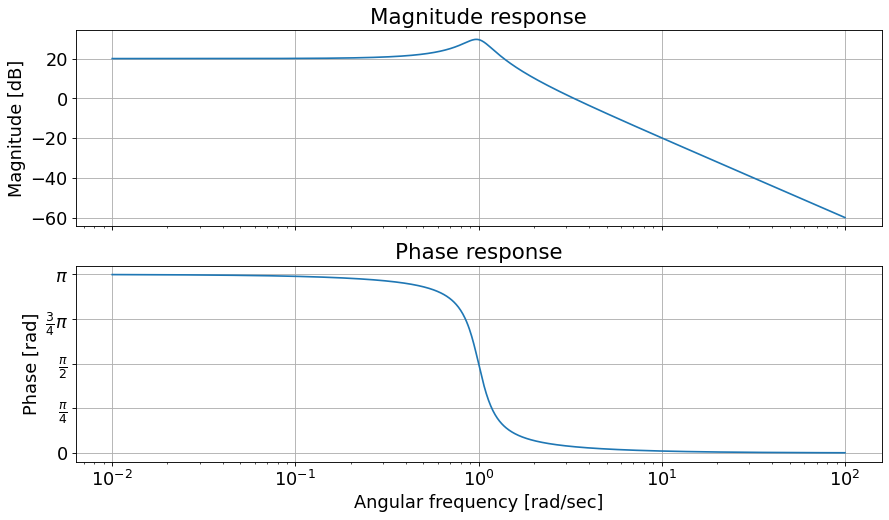

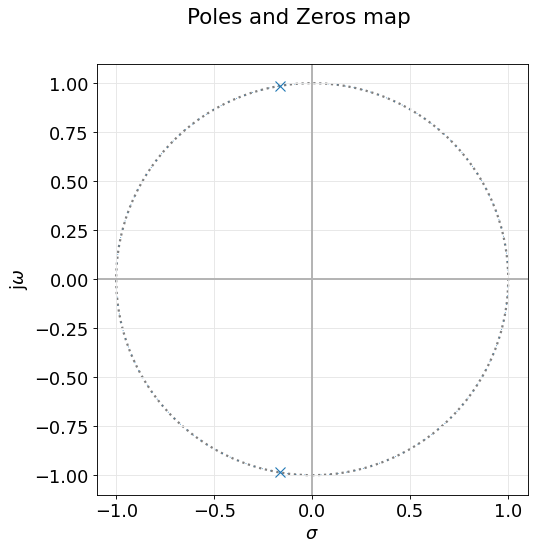

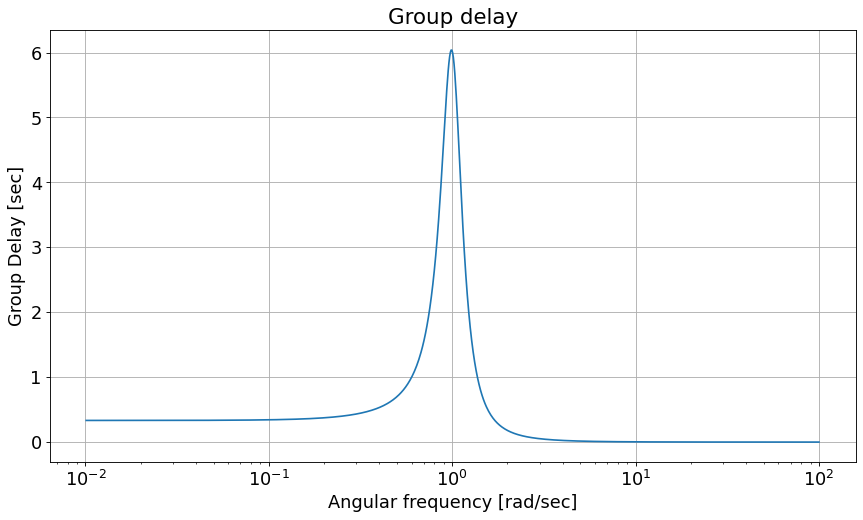

In [11]:
# Definicion de componentes
C = 100e-6
R1 = 1e3
R2 = 30e3
R3 = 10e3

# Definicion de la funcion transferencia
my_tf = TransferFunction( [(-R3)/(R1 * C**2 * R3**2)], [1, 1/(R2*C), 1/(R3**2 * C**2)] )

# Grafico de bode
bodePlot(my_tf, fig_id=1)
    
# Grafico de polos y ceros
pzmap(my_tf, fig_id=2) #S plane pole/zero plot

# Grafico temporal delay    
GroupDelay(my_tf, fig_id=3)

### Bonus: Simulacion circuital LTSpice (sin normalizacion) <a class="anchor" id="simCircuitalSinNorm"></a>

##### Red o circuito

<img src="./img/TS2_Albanesi_CircuitoSinNormalizar.png" width="800" />

##### Formas de onda

<img src="./img/TS2_Albanesi_WaveformSinNormalizar.png" width="800" />

##### Cursor 1

<img src="./img/TS2_Albanesi_CursorSinNormalizar.png" width="300" />

### Bonus: Obteniendo los valores normalizados en frecuencia e impedancia <a class="anchor" id="normalizacion"></a>

#### Resolucion analitica

In [34]:
# Incorporacion y visualizacion de PDF con la resolucion analitica
from IPython.display import IFrame
IFrame("./doc/TS2_Albanesi_AnaliticoNormalizacion.pdf", width=1000, height=1000)

### Bonus: Simulacion numerica (con normalizacion) <a class="anchor" id="simNumericaConNorm"></a>

##### Graficos

Valores de componentes normalizados en frecuencia e impedancia:
Cn: 1.0
R1n: 0.1
R2n: 3.0
R3n: 1.0
R4n: 1.0


(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

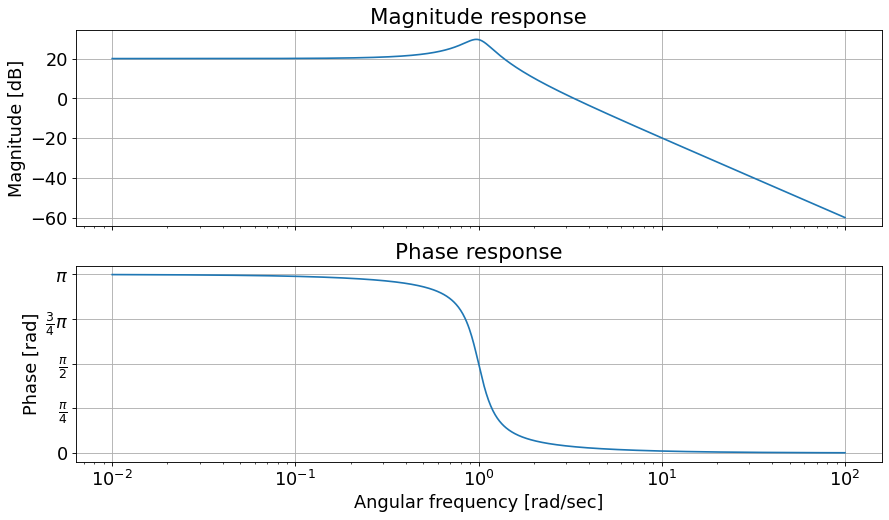

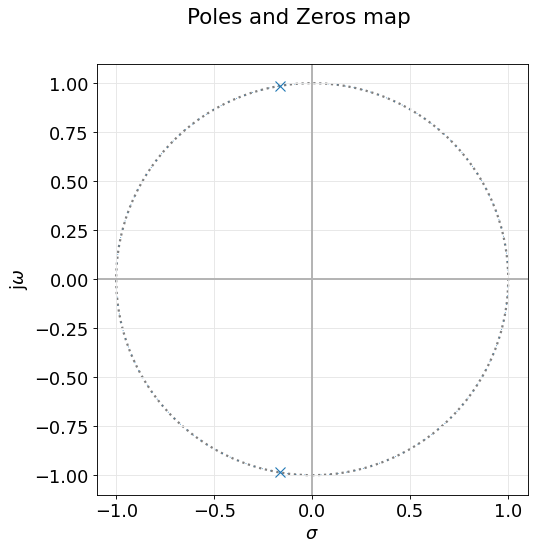

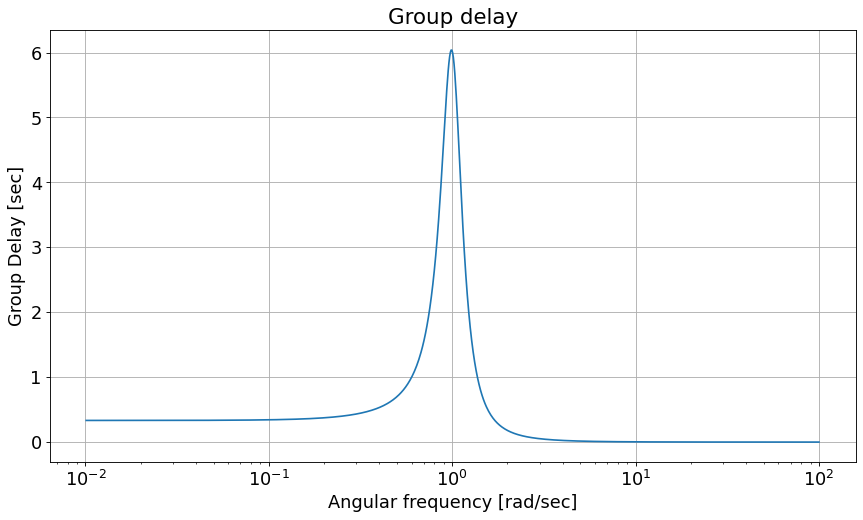

In [21]:
# Definicion de componentes
C = 100e-6
R1 = 1e3
R2 = 30e3
R3 = 10e3
R4 = 10e3

# Norma de frecuencia = w0
Ww = 1/(R3*C)

# Norma de impedancia = R3
Wz = R3

# Componentes normalizados en frecuencia e impedancia
Cn = C*(Wz/Ww)
R1n = R1/Wz
R2n = R2/Wz
R3n = R3/Wz
R4n = R4/Wz

# Muestro los valores normalizados
print('Valores de componentes normalizados en frecuencia e impedancia:')
print(f'Cn: {Cn}')
print(f'R1n: {R1n}')
print(f'R2n: {R2n}')
print(f'R3n: {R3n}')
print(f'R4n: {R4n}')


# Definicion de la funcion transferencia
my_tf = TransferFunction( [(-1/R1n)], [1, 1/R2n, 1] )

# Grafico de bode
bodePlot(my_tf, fig_id=1)
    
# Grafico de polos y ceros
pzmap(my_tf, fig_id=2) #S plane pole/zero plot

# Grafico temporal delay    
GroupDelay(my_tf, fig_id=3)

### Bonus: Simulacion circuital (con normalizacion) <a class="anchor" id="simCircuitalConNorm"></a>

##### Red o circuito

<img src="./img/TS2_Albanesi_CircuitoConNormalizar.png" width="800" />

##### Formas de onda

<img src="./img/TS2_Albanesi_WaveformConNormalizar.png" width="800" />

### Bonus: Sensibilidad <a class="anchor" id="sensibilidad"></a>

##### Sensibilidad $S_C^{\omega_0}$

<hr>

$\omega_0 = \frac{1}{R_3.C}$

$Q = \frac{R_2}{R_3}$

$S_C^{\omega_0} = \frac{C}{\omega_0} . \frac{\partial\omega_0}{{\partial}C}$

$\frac{\partial\omega_0}{{\partial}C} = \frac{1}{R_3} . (- \frac{1}{C^2}) = - \frac{1}{R_3.C^2}$

$S_C^{\omega_0} = \frac{C}{\frac{1}{R_3.C}} . (- \frac{1}{R_3.C^2})$

$S_C^{\omega_0} = R_3 . C^2 . (- \frac{1}{R_3.C^2}) = -1$

##### Sensibilidad $S_{R_2}^{Q}$

<hr>

$S_{R_2}^Q = \frac{R_2}{Q} . \frac{{\partial}Q}{{\partial}R_2}$

$\frac{{\partial}Q}{{\partial}R_2} = \frac{1}{R_3}$

$S_{R_2}^Q = \frac{R_2}{\frac{R_2}{R_3}} . \frac{1}{R_3} = 1$


##### Sensibilidad $S_{R_3}^{Q}$

<hr>

$S_{R_3}^Q = \frac{R_3}{Q} . \frac{{\partial}Q}{{\partial}R_3}$

$\frac{{\partial}Q}{{\partial}R_3} = R_2 . (- \frac{1}{{R_3}^2}) = - \frac{R_2}{{R_3}^2}$

$S_{R_3}^Q = \frac{R_3}{\frac{R_2}{R_3}} . (- \frac{R_2}{{R_3}^2}) = - \frac{{R_3}^2}{{R_3}^2} = -1$

### Bonus: Transferencia Butterworth <a class="anchor" id="transferenciaButter"></a>

#### Analitico

La transferencia Butterworth para un filtro pasa bajos se expresa de la siguiente forma:

$T(s) = \frac{1}{s^2 + s . \sqrt{2} + 1}$

Por lo tanto, debemos hallar los terminos y valores para igualar la transferencia hallada con la de Butterworth:

$\omega_0^2 = \frac{1}{{R_3}^2.C^2} = 1$

$\frac{\omega_0}{Q} = \frac{1}{R_2.C} = \sqrt{2}$

$k = \frac{R_3}{R_1} = 1$

Propongo el valor del capacitor $C = 1$

Por lo tanto, las resistencias quedan de la siguiente forma:

$R_3 = 1$

$R_2 = \frac{1}{\sqrt{2}}$

$R_1 = 1$


#### Simulacion numerica

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

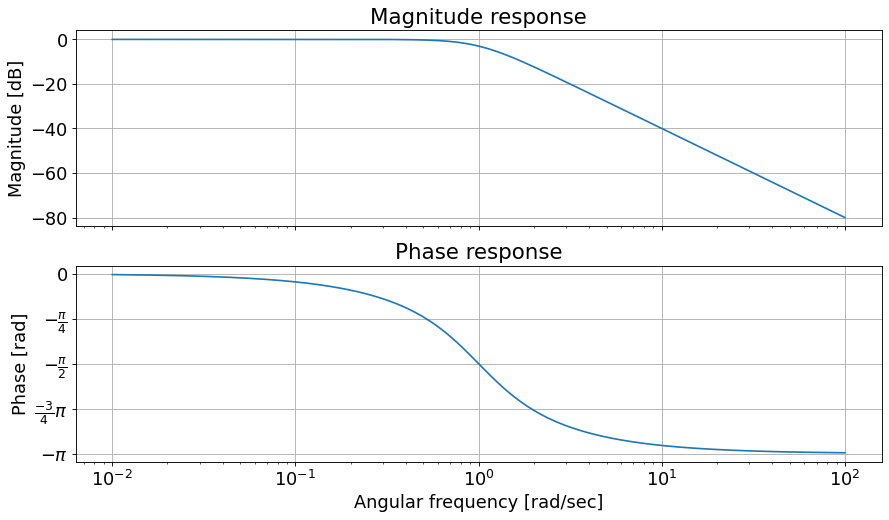

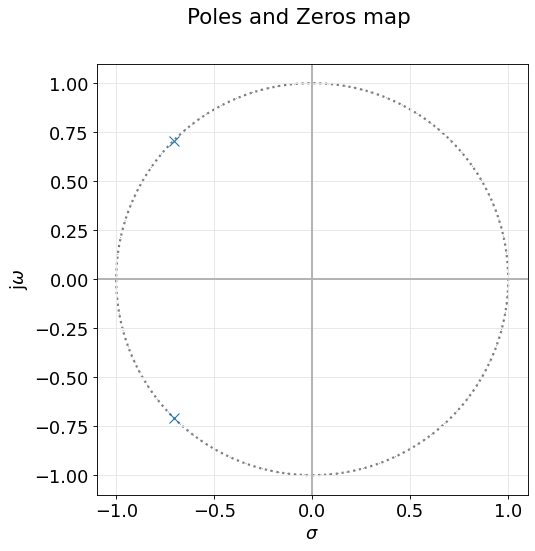

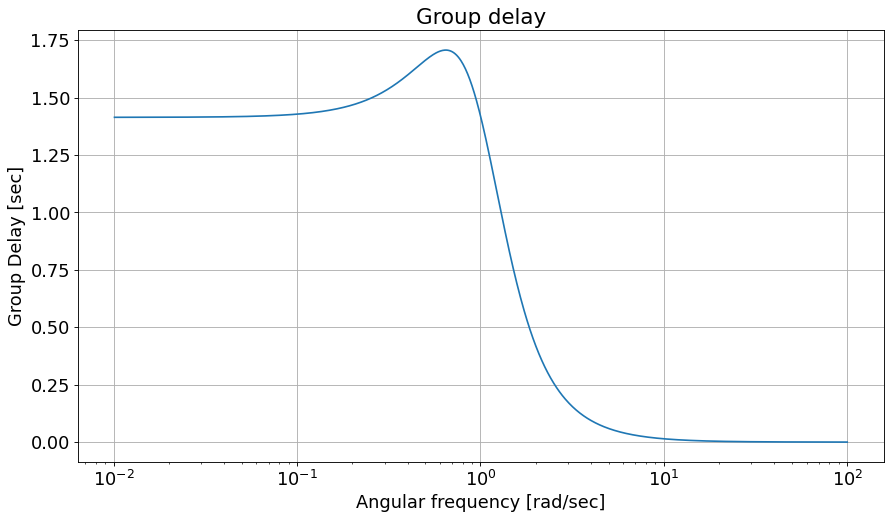

In [23]:
# Definicion de la funcion transferencia
num = [1]
den = [1, np.sqrt(2), 1]
my_tf = TransferFunction(num, den)

# Grafico de bode
bodePlot(my_tf, fig_id=1)
    
# Grafico de polos y ceros
pzmap(my_tf, fig_id=2) #S plane pole/zero plot

# Grafico temporal delay    
GroupDelay(my_tf, fig_id=3)

#### Simulacion circuital

In [31]:
# Componentes normalizados
R1n = 1
R2n = 1/np.sqrt(2)
R3n = 1
R4n = 1
Cn = 1

# Norma de frecuencia
Ww = 1

# Norma de impedancia
Wz = 10e3

# Componentes desnormalizados
R1desn = R1n*Wz
R2desn = R2n*Wz
R3desn = R3n*Wz
R4desn = R4n*Wz
Cdesn = Cn/(Ww*Wz)

print(f'R1desn: {R1desn}')
print(f'R2desn: {R2desn}')
print(f'R3desn: {R3desn}')
print(f'R4desn: {R3desn}')
print(f'Cdesn: {Cdesn}')

R1desn: 10000.0
R2desn: 7071.067811865475
R3desn: 10000.0
R4desn: 10000.0
Cdesn: 0.0001


##### Red o circuito

<img src="./img/TS2_Albanesi_ButterworthCircuito.png" width="800" />

##### Forma de onda

<img src="./img/TS2_Albanesi_ButterworthWaveform.png" width="800" />

### Bonus: Filtro pasabanda <a class="anchor" id="filtroPasabanda"></a>

Si utilizamos el mismo circuito, pero la salida ahora la tomamos luego del primer amplificador operacional, es decir, despues de la salida de U1, se podra observar y comprobar que se realiza la funcion de filtrado pasa banda.

#### Resolucion analitica

In [35]:
# Incorporacion y visualizacion de PDF con la resolucion analitica
from IPython.display import IFrame
IFrame("./doc/TS2_Albanesi_AnaliticoPasabanda.pdf", width=1000, height=1000)

#### Simulacion numerica

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

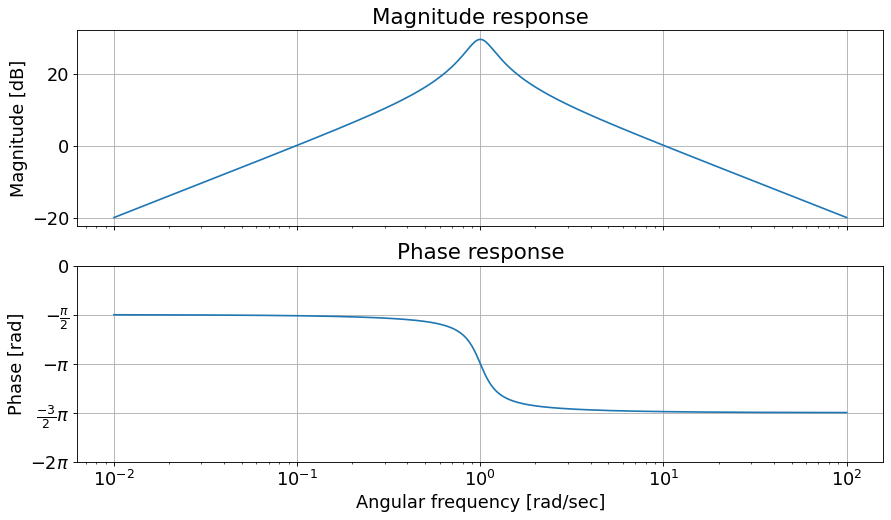

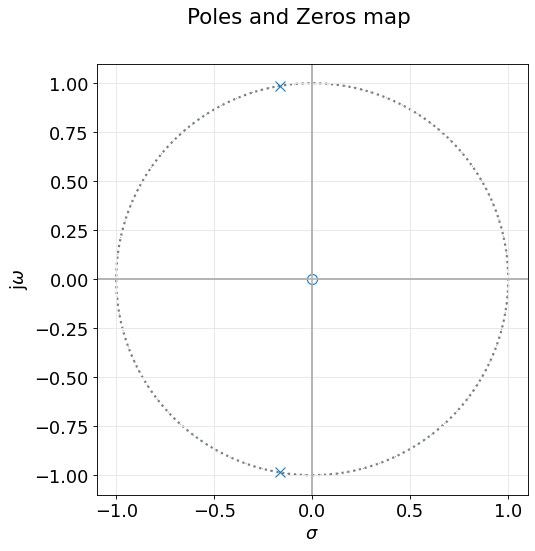

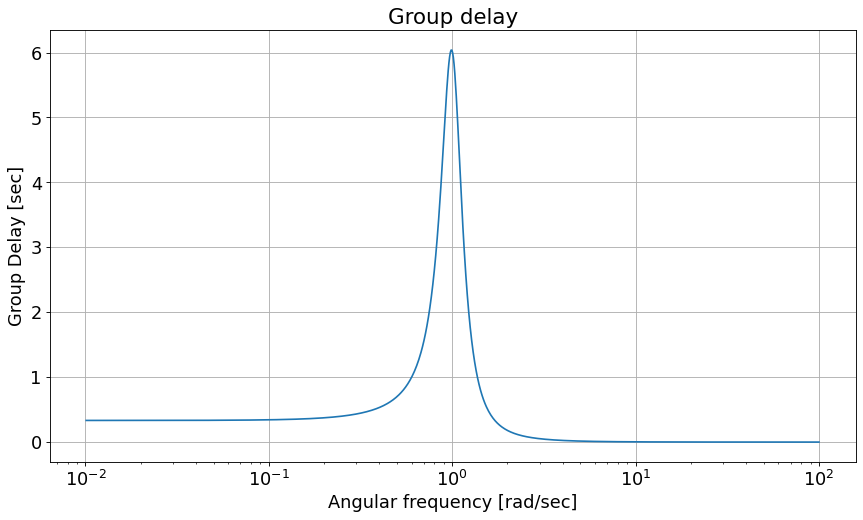

In [36]:
# Definicion de la funcion transferencia
my_tf = TransferFunction( [-10, 0], [1, 1/3, 1] )

# Grafico de bode
bodePlot(my_tf, fig_id=1)
    
# Grafico de polos y ceros
pzmap(my_tf, fig_id=2) #S plane pole/zero plot

# Grafico temporal delay    
GroupDelay(my_tf, fig_id=3)

#### Simulacion circuital

##### Red o circuito

<img src="./img/TS2_Albanesi_CircuitoPasabanda.png" width="800" />

##### Forma de onda

<img src="./img/TS2_Albanesi_WaveformPasabanda.png" width="800" />

### Conclusiones <a class="anchor" id="conclusiones"></a>

Como conclusion general se puede observar que esta red implementada mediante elementos activos con el opamp, permite, a diferencia de las redes pasivas, obtener una determinada ganancia. Tanto los calculos analiticos, simulaciones numericas y circuitales coinciden comprobando la validez de los resultados.

Resulta muy comodo aplicar normalizacion ya que permite trabajar con un algebra mas simple. Con respecto a la sensibilidad se pudo observar que dieron numeros enteros, lo que se traduce a un determinado porcentaje. Por ejemplo, en el caso de la sensibilidad de $\omega_0$ debido a la variacion del capacitor $C$ se puede decir, que una variacion en el capacitor de 1% afectara 1% a la frecuencia natural del sistema, lo que indica una relacion lineal unitaria.

Ademas, resulto muy interesante el analisis de la transferencia del filtro, debido a que se pudo realizar la comparacion con una transferencia del tipo Butterworth pasa bajo y ademas, poder obtener la funcion de filtrado pasa banda a partir de tomar otra salida del mismo circuito.